In [1]:
# 加载鸢尾花数据集，size = 150
using RDatasets: dataset
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [12]:
# 将Dataframe数据转换为Array
X = convert(Array, iris[[:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]])
y = convert(Array, iris[:Species])

150-element Array{String,1}:
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 ⋮          
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [14]:
# 加载sklearn库
using ScikitLearn

# 加载模型
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model.logistic.LogisticRegression'>

In [15]:
# 定义模型
model = LogisticRegression(fit_intercept=true)

#将数据输入模型
fit!(model, X, y)

# 使用predict函数进行预测，并计算准确率
accuracy = sum(predict(model, X) .== y) / length(y)
println("accuracy: $accuracy")

accuracy: 0.96


In [17]:
# 用Sklearn做N折交叉验证
using ScikitLearn.CrossValidation: cross_val_score
cross_val_score(LogisticRegression(), X, y; cv=5)

5-element Array{Float64,1}:
 1.0               
 0.9666666666666667
 0.9333333333333333
 0.9               
 1.0               

In [19]:
using Suppressor: @suppress_err #忽略警告
@suppress_err using ScikitLearn.GridSearch: GridSearchCV
# 直接try不同的参数并返回最优参数
gridsearch = GridSearchCV(LogisticRegression(), Dict(:C => 0.1:0.1:2.0))# C为正则项
fit!(gridsearch, X, y)
println("Best parameters: $(gridsearch.best_params_)")

┌ Info: Precompiling Suppressor [fd094767-a336-5f1f-9728-57cf17d0bbfb]
└ @ Base loading.jl:1187


Best parameters: Dict{Symbol,Any}(:C=>1.1)


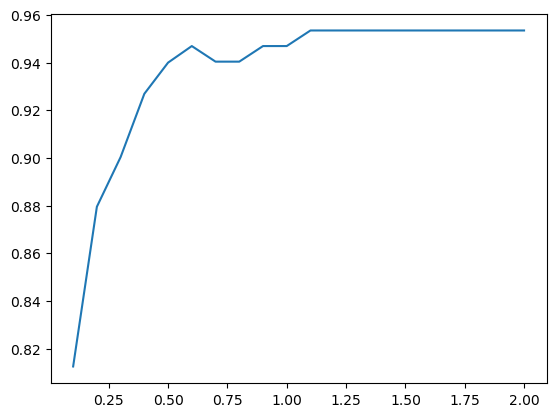

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a41517128>

In [20]:
# 画图，在不同参数情况下，准确率的变化情况
using PyPlot

plot([cv_res.parameters[:C] for cv_res in gridsearch.grid_scores_],
     [mean(cv_res.cv_validation_scores) for cv_res in gridsearch.grid_scores_])